In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import random
import scipy
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (12, 12)

In [2]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/home/notshahil/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def load_metric(expdir, metric='loss', split='tr', meta=True):
    if meta:
        tr = np.load(expdir + '/meta_{}_{}.npy'.format(split, metric))
    else:
        tr = np.load(expdir + '/{}_{}.npy'.format(split, metric))
    return tr
    #return tr[tr>0]

def smooth(arr, r):
    smoothed = np.zeros(len(arr))
    for i in range(len(arr)//r):
        chunk = arr[i*r:i*r+r]
        avg = np.sum(chunk) / len(chunk)
        smoothed[i*r:i*r+r] = avg
    return smoothed[smoothed >0]

In [4]:
plt.rcParams['figure.figsize'] = (20, 8)

def plot_metrics(expdir0):
    plt.figure()
    
    plt.subplot(1,2,1)
    plt.title('Loss', fontsize = 20, fontweight = 'bold')
    t1, = plt.plot(smooth(load_metric(expdir0, 'loss', 'tr', False), 2))
    t2, = plt.plot(smooth(load_metric(expdir0, 'loss', 'val', False), 2))
    t3, = plt.plot(smooth(load_metric(expdir0, 'loss', 'tr'), 2))
    t4, = plt.plot(smooth(load_metric(expdir0, 'loss', 'val'), 2))
    #plt.ylim((0, 3))
    #plt.xlim((0, 200))


    plt.subplot(1,2,2)
    t1, = plt.plot(smooth(load_metric(expdir0, 'acc', 'tr', False), 2))
    t2, = plt.plot(smooth(load_metric(expdir0, 'acc', 'val', False), 2))
    t3, = plt.plot(smooth(load_metric(expdir0, 'acc', 'tr'), 2))
    t4, = plt.plot(smooth(load_metric(expdir0, 'acc', 'val'), 2))
    plt.legend([t1, t2, t3, t4], ['train','val', 'meta-train', 'meta-val'], loc = 5)
    #plt.ylim((0, 1.05))
    #plt.xlim((0, 200))
    plt.xlabel('Number of iterations',fontsize= 20, fontweight = 'bold')
    plt.ylabel('Accuracy',fontsize = 20,fontweight = 'bold')

In [103]:
#expdir0 = '../output/maml-mnist-10way-5shot' 
#expdir1 = '../output/maml-omniglot-5way-1shot-adam' 
#expdir2 = '../output/maml-omniglot-20way-1shot-adam' 

#plot_metrics(expdir0)
#plot_metrics(expdir1)
#plot_metrics(expdir2)

In [5]:
pwd

'/home/notshahil/simphiwe/maml/pytorch-maml/notebooks'

In [16]:
import seaborn as sns
sns.set()

pytorch-maml/  README.md


In [6]:
expdir00 = '../output/maml-omniglot-5way-1shot-TEST' 
#plot_metrics(expdir00)

In [117]:
ls

pytorch-maml/  README.md


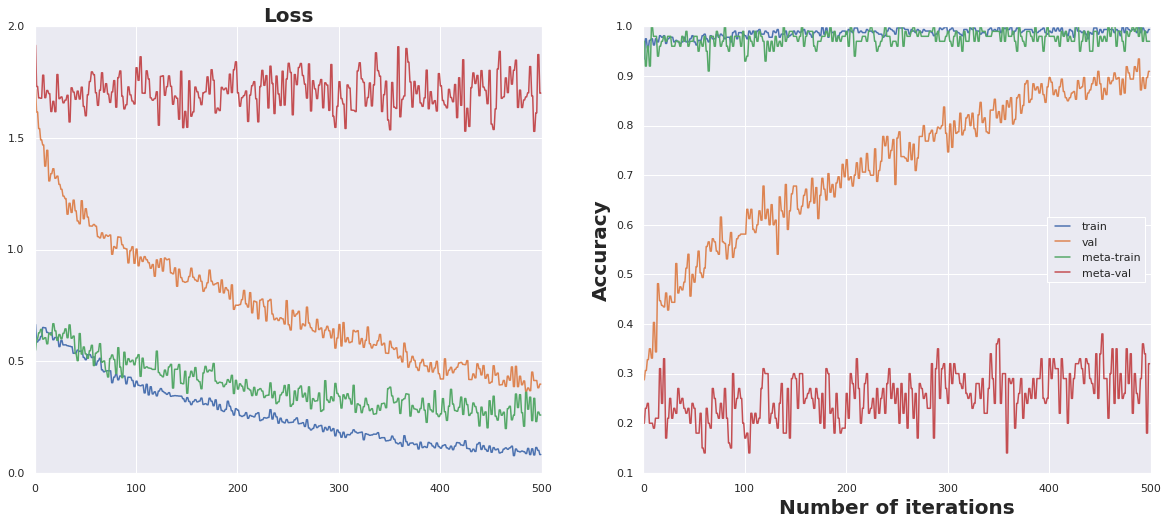

In [17]:
plot_metrics(expdir00)

In [99]:
ls

data/  notebooks/  output/  README.md  src/


In [100]:
cd ..


/home/notshahil/simphiwe/maml


In [101]:
ls


pytorch-maml/  README.md


In [17]:
cd test101

/home/notshahil/simphiwe/maml/test101


In [18]:
ls


meta_tr_acc.npy      train_iter_3000.pth  train_iter_7500.pth
meta_tr_loss.npy     train_iter_3500.pth  train_iter_8000.pth
meta_val_acc.npy     train_iter_4000.pth  train_iter_8500.pth
meta_val_loss.npy    train_iter_4500.pth  train_iter_9000.pth
tr_acc.npy           train_iter_5000.pth  train_iter_9500.pth
train_iter_0.pth     train_iter_500.pth   tr_loss.npy
train_iter_1000.pth  train_iter_5500.pth  val_acc.npy
train_iter_1500.pth  train_iter_6000.pth  val_loss.npy
train_iter_2000.pth  train_iter_6500.pth
train_iter_2500.pth  train_iter_7000.pth


In [8]:
import numpy as geek 


In [10]:
pwd


'/home/notshahil/simphiwe/maml/pytorch-maml/notebooks'

In [25]:
!cd ../

loss.png                              omniglot_learning_curves.ipynb
omniglot_learning_curves-Copy1.ipynb  train.png


In [11]:
a = geek.load('../output/maml-omniglot-5way-1shot-TEST/tr_acc.npy')

In [12]:
b = geek.load('../output/maml-omniglot-5way-1shot-TEST/meta_tr_acc.npy')

In [49]:
#geek.std(b)/np.sqrt(len(b))

In [14]:
mean(a)

0.9866750000000001

In [15]:
mean(b)

0.9762799999999999

In [22]:
round(1.5)

2